https://zhuanlan.zhihu.com/p/164390177

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from server_pull import *
import pandas as pd

In [2]:
class Bandit:
    def __init__(self):
        #self.arm_values = np.random.normal(0,1,10)       #arm_values 
        self.K = np.zeros(24)                            #K=24 
        self.est_values = np.zeros(24)                   # est_values  
        
    def get_reward(self,action):
        reward = pull('user7', 'XTkjktIc', action)['Reward']
#         noise = np.random.normal(0,0.1)                      
#         reward = self.arm_values[action]+noise
        return reward
    
    def choose_eps_greedy(self,epsilon):                # choose_eps_greedy 
        rand_num = np.random.random()
        if epsilon >rand_num:
            return np.random.randint(24)
        else:
            return np.argmax(self.est_values)
        
    def update_est(self,action,reward):                #update_est   
        self.K[action]+=1
        alpha = 1./self.K[action]
        self.est_values[action]+=alpha *(reward - self.est_values[action])

In [3]:
def experiment(bandit,Npulls,epsilon):                         
    step_reward = []                                    
    avgacc_reward = [0]
    action_arm = []
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        action_arm.append(action)
        step_reward.append(R)                                  
        avgacc_reward.append((i*avgacc_reward[-1]+R)/(i+1))  
    return [np.array(step_reward),np.array(avgacc_reward[1:]),np.array(action_arm)]

In [4]:
## Calculate the average step_reward and avgacc_reward
## epsilon = 0, 0.01, 0.1 and compare the performance

Nexp = 1            
Npulls = 1000       
# outcome_eps0p0 = np.zeros(Npulls)
outcome_eps0p01 = np.zeros(Npulls)
outcome_eps0p1 = np.zeros(Npulls)
# avg_avgacc_eps0p0 = np.zeros(Npulls)
avg_avgacc_eps0p01 = np.zeros(Npulls)
avg_avgacc_eps0p1 = np.zeros(Npulls)
# action_arm_eps0p0 = np.zeros(Npulls)
action_arm_eps0p01 = np.zeros(Npulls)
action_arm_eps0p1 = np.zeros(Npulls)


for i in range(Nexp):
#     bandit = Bandit()
#     [step_reward, avgacc_reward,action_arm] = experiment(bandit,Npulls,0.0)
#     outcome_eps0p0+= step_reward
#     avg_avgacc_eps0p0 += avgacc_reward
#     action_arm_eps0p0 += action_arm
    
    
    bandit = Bandit()
    [step_reward, avgacc_reward,action_arm] = experiment(bandit,Npulls,0.01)
    outcome_eps0p01+= step_reward
    avg_avgacc_eps0p01 += avgacc_reward
    action_arm_eps0p01 += action_arm
    
    bandit = Bandit()
    [step_reward, avgacc_reward,action_arm] = experiment(bandit,Npulls,0.1)
    outcome_eps0p1+= step_reward
    avg_avgacc_eps0p1 += avgacc_reward
    action_arm_eps0p1 += action_arm

# calculate the average   
# avg_outcome_eps0p0 = outcome_eps0p0 / np.float(Nexp)
avg_outcome_eps0p01 = outcome_eps0p01 / np.float(Nexp)
avg_outcome_eps0p1 = outcome_eps0p1 / np.float(Nexp)
# avg_avgacc_eps0p0 /= np.float(Nexp)
avg_avgacc_eps0p01 /= np.float(Nexp)
avg_avgacc_eps0p1 /= np.float(Nexp)

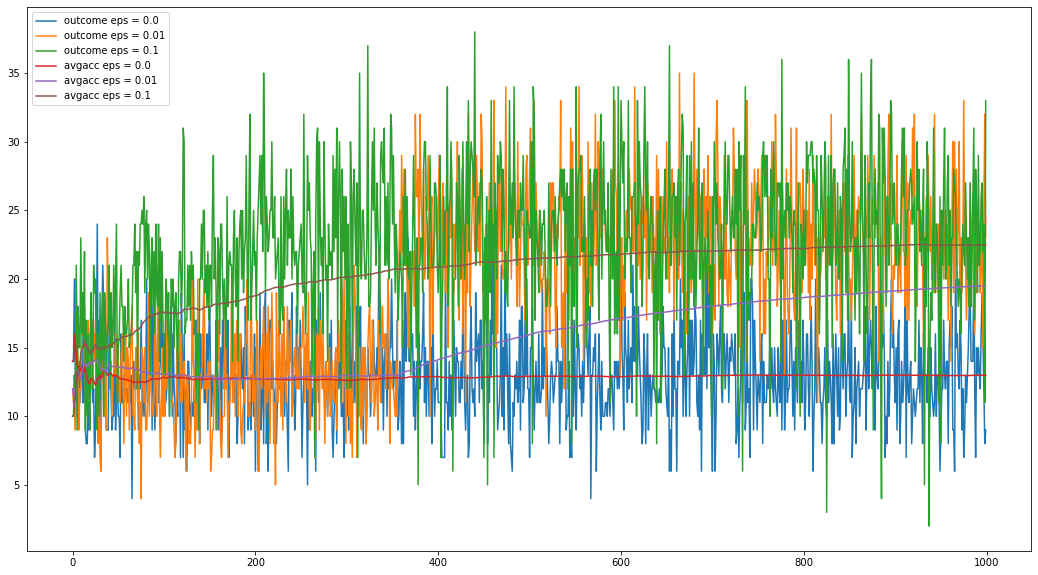

In [5]:
plt.figure(figsize=(18,10))
# plt.plot(avg_outcome_eps0p0,label = "outcome eps = 0.0")
plt.plot(avg_outcome_eps0p01,label = "outcome eps = 0.01")
plt.plot(avg_outcome_eps0p1,label = "outcome eps = 0.1")

# plt.plot(avg_avgacc_eps0p0,label = "avgacc eps = 0.0")
plt.plot(avg_avgacc_eps0p01,label = "avgacc eps = 0.01")
plt.plot(avg_avgacc_eps0p1,label = "avgacc eps = 0.1")
plt.legend()
plt.show()

### eps = 0.01

In [31]:
# print(outcome_eps0p01)
# print(action_arm_eps0p01)
Nt_a = np.zeros(24) 
sum_rewards = np.zeros(24) 
hist_arm_selected = []
for i in range(len(action_arm_eps0p01)):
    Nt_a[int(action_arm_eps0p01[i])] += 1
    sum_rewards[int(action_arm_eps0p01[i])] += outcome_eps0p01[i]
    hist_arm_selected.append(int(action_arm_eps0p01[i]))

In [32]:
# Output the results(1000 pulls)
pull_hist = pd.DataFrame({'t': np.array(range(1,Npulls+1)), 
                          'rewards': outcome_eps0p01, 
                          'arm_selected': hist_arm_selected})
results = pd.DataFrame({'Num_arms_selected': Nt_a, 'Sum_rewards_arms': sum_rewards})

In [33]:
pull_hist.to_csv('pull_hist.csv')
results.to_csv('pull_results.csv')

In [34]:
print(sum(sum_rewards))

avg = []
for i in range(len(sum_rewards)):
    if Nt_a[i] == 0:
        avg.append(0)
    else:
        avg.append(sum_rewards[i]/Nt_a[i])
print(avg)

regret = max(avg)*Npulls-sum(sum_rewards)
print(regret)

19502.0
[13.008498583569406, 19.0, 19.0, 0, 13.0, 0, 0, 0, 19.0, 0, 0, 0, 17.0, 10.0, 11.0, 0, 0, 0, 8.0, 0, 23.21069182389937, 0, 0, 0]
3708.6918238993712


### eps = 0.1

In [27]:
# print(outcome_eps0p1)
# print(action_arm_eps0p1)
Nt_a = np.zeros(24) 
sum_rewards = np.zeros(24) 
hist_arm_selected = []
for i in range(len(action_arm_eps0p1)):
    Nt_a[int(action_arm_eps0p1[i])] += 1
    sum_rewards[int(action_arm_eps0p1[i])] += outcome_eps0p1[i]
    hist_arm_selected.append(int(action_arm_eps0p1[i]))

In [28]:
# Output the results(1000 pulls)
pull_hist = pd.DataFrame({'t': np.array(range(1,Npulls+1)), 
                          'rewards': outcome_eps0p1, 
                          'arm_selected': hist_arm_selected})
results = pd.DataFrame({'Num_arms_selected': Nt_a, 'Sum_rewards_arms': sum_rewards})

In [29]:
pull_hist.to_csv('pull_hist.csv')
results.to_csv('pull_results.csv')

In [30]:
print(sum(sum_rewards))

avg = []
for i in range(len(sum_rewards)):
    if Nt_a[i] == 0:
        avg.append(0)
    else:
        avg.append(sum_rewards[i]/Nt_a[i])
print(avg)

regret = max(avg)*Npulls-sum(sum_rewards)
print(regret)

22482.0
[12.4, 14.333333333333334, 19.923076923076923, 10.0, 9.5, 20.5, 21.02173913043478, 19.2, 19.25, 18.8, 17.8, 4.75, 20.4, 13.666666666666666, 13.6, 14.4, 24.5149136577708, 6.333333333333333, 8.0, 13.5, 23.114583333333332, 10.142857142857142, 4.0, 16.806451612903224]
2032.9136577708014
